Q1 - Altere o codigo de Gauss-Seidel, apresentado em video, adicionando ao codigo o criterio de Sassenfeld. O codigo deve ser parado caso este criterio nao seja satisfeito e imprimir uma mensagem na janela de comandos. Coloque dois exemplos de sistemas, um exibindo a solucao pelo metodo e outro em que o criterio de Sassenfeld nao sendo satisfeito, portanto o codigo exibira um de erro.

In [1]:
import numpy as np
from numpy import linalg
import sys
import matplotlib.pyplot as plt
import math
from math import e
from sympy import *


In [2]:
#gauss_seidel- com criterio de sassenfeld

A = np.array([[8, 3, 1], [4, 7, -3], [3, 4, 5]])
B = [3, 2, 1]
N = 100
tol = 0.001 # Critério de Parada 'tolerância do erro'
ordem = len(B) 
if np.linalg.det(A) ==0:
    sys.exit('DET =0, Matriz Singular ou possui Equações Linearmente Dependentes')    
print('det A: ', np.linalg.det(A))

#criterio de sassenfeld
beta=np.zeros(ordem)
for i in range(ordem):
    beta[i]= 0
    beta[i] = sum(A[i])-A[i][i]
    j=0
    while j < i:
        beta[i] -= A[i][j]
        beta[i] += A[i][j]*beta[j]
        j += 1
    beta[i] /= A[i][i]
print('beta: ',beta)
if max(beta)>1:
    sys.exit('Nao atende o critério de sassenfeld')

# Vetor Inicial
X=np.zeros(ordem)
for i in range(ordem):
    X[i]=B[i]/A[i,i]
print('X0: ',X)

it = 0 

#iteracoes
XX=np.zeros(ordem)
while it<100:
    it +=1
    for i in range(ordem):
        XX[i] = X[i]
        X[i] = B[i]
        for j in range(ordem):
            if i != j:
                X[i] -=A[i,j]*X[j]
        X[i] /= A[i,i]
    print('X'+str(it)+'= ',X)
    erro = np.linalg.norm(X-XX,np.inf)
    errorel = np.linalg.norm(X-XX,np.inf)/abs(max(X))
    print('erro: ',erro)
    print('errorel: ',errorel)
    if erro<tol or errorel<tol:
        print('Criterio de Parada Atingido')
        sys.exit(0)

det A:  283.99999999999983
beta:  [ 0.5        -0.14285714  0.18571429]
X0:  [0.375      0.28571429 0.2       ]
X1=  [ 0.24285714  0.23265306 -0.13183673]
erro:  0.33183673469387753
errorel:  1.3663865546218488
X2=  [ 0.30423469  0.05536443 -0.02683236]
erro:  0.1772886297376093
errorel:  0.5827363982654943
X3=  [ 0.35759238  0.0698762  -0.07045639]
erro:  0.053357689504373196
errorel:  0.1492137192625405
X4=  [ 0.35760347  0.05117385 -0.05550116]
erro:  0.018702349095614912
errorel:  0.05229912579473543
X5=  [ 0.36274745  0.05464381 -0.06136352]
erro:  0.005862359562594531
errorel:  0.016160994448026305
X6=  [ 0.36217901  0.0524562  -0.05927237]
erro:  0.0021876156215288947
errorel:  0.006040150205719712
X7=  [ 0.36273797  0.053033   -0.06006919]
erro:  0.0007968200107906775
errorel:  0.0021966821075063096
Criterio de Parada Atingido


SystemExit: 0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
#gauss_seidel- com criterio de sassenfeld

A = [[3, 4, 5], [4, 7, -3], [8, 3, 1]]
B = [1, 2, 3]
N = 100
tol = 0.001
ordem = np.shape(A)[0] 
if np.linalg.det(A) ==0:
    sys.exit('DET =0, Matriz Singular ou possui Equações Linearmente Dependentes')    
print('det A: ', np.linalg.det(A))

#criterio de sassenfeld
beta=np.zeros(ordem)
for i in range(ordem):
    beta[i]= 0
    beta[i] = sum(A[i])-A[i][i]
    j=0
    while j < i:
        beta[i] -= A[i][j]
        beta[i] += A[i][j]*beta[j]
        j += 1
    beta[i] /= A[i][i]
print('beta: ',beta)
if max(beta)>1:
    print('Nao atende o critério de sassenfeld')
    sys.exit(0)

# Vetor Inicial
X=np.zeros(ordem)
for i in range(ordem):
    X[i]=B[i]/A[i,i]
print('X0: ',X)

it = 0 

#iteracoes
XX=np.zeros(ordem)
while it<100:
    it +=1
    for i in range(ordem):
        XX[i] = X[i]
        X[i] = B[i]
        for j in range(ordem):
            if i != j:
                X[i] -=A[i,j]*X[j]
        X[i] /= A[i,i]
    print('X'+str(it)+'= ',X)
    erro = np.linalg.norm(X-XX,np.inf)
    errorel = np.linalg.norm(X-XX,np.inf)/abs(max(X))
    print('erro: ',erro)
    print('errorel: ',errorel)
    if erro<tol or errorel<tol:
        print('Criterio de Parada Atingido')
        sys.exit(0)

det A:  -283.99999999999983
beta:  [ 3.          1.28571429 27.85714286]
Nao atende o critério de sassenfeld


SystemExit: 0

Q2 - Assuma que em uma determinada regiao foi feito no mes de Abril um levantamento dos casos positivos para COVID-19, estes dados se encontram na tabela abaixo. Plote os pontos (dia, quantidade de casos) e ajuste pela funcao
o(t) = a*exp^b*t
em seguida faca uma estimativa para os dias em que nao foram registrados o numero de casos (acumulados) e extrapole fazendo uma previsao para 31o dia de registro.

A= [[  27.  415.]
 [ 415. 8587.]]

b= [ 274.57029115 4411.65257674]

c0= 8.83703325502734
c1= 0.08667564643151979

Casos dia 12:  19479.95003404039

Casos dia 18:  32767.579995428

Casos dia 20:  38969.952664143275

Casos dia 31:  101111.41376215869



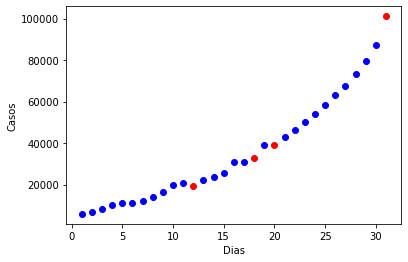

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,19,21,22,23,24,25,26,27,28,29,30])
Casos=np.array([5868,6932,8076,10361,11281,11298,12240,14072,16238,19943,20727,22318,23830,25758,30891,30961,39144,43079,46195,
            50036,54043,58509,63196,67410,73235,79685,87187])
Y=np.log(Casos) # convertendo o nº de casos para ln de Casos
pontos = len(X)
grau = 1 # grau de convergência
H = np.zeros(((2**grau)+1,pontos))
# Vetor H /p calculo das somatórias
for i in range(len(H)):
    for j in range(len(H[0])):
        H[i][j]=pow(X[j],i)

#vetores X´s x Y
XY = np.zeros((grau,pontos))
for i in range(len(XY)):
    for j in range(len(XY[0])):
        XY[i][j]=H[i+1][j]*Y[j]
# Sistema Ac=b
A=np.zeros((grau+1,grau+1))
b=np.zeros(grau+1)
for i in range(len(A)):
    for j in range(len(A)):
        A[i][j]=H[i].dot(H[j])
        b[i]=H[i].dot(Y)
print('A=',A)
print()
print('b=',b)
print()


#Resolvendo o sistema
c = np.linalg.solve(A,b)
for i in range(len(c)):
    print('c'+str(i)+'=',c[i])
print()   
# Encontrando os valores para os dias 12/18/20/31
y12 = c[0] + c[1]*12
Caso12 = np.exp(y12)
print('Casos dia 12: ', Caso12)
print()
y18 = c[0] + c[1]*18
Caso18 = np.exp(y18)
print('Casos dia 18: ', Caso18)
print()
y20 = c[0] + c[1]*20
Caso20 = np.exp(y20)
print('Casos dia 20: ', Caso20)
print()
y31 = c[0] + c[1]*31
Caso31 = np.exp(y31)
print('Casos dia 31: ', Caso31)
print()
CasosF = [Caso12, Caso18, Caso20, Caso31]
XF = [12,18,20,31]
#Printando o Gráfico 
plt.plot(X,Casos,'ob') #dados fornecidos (bolinhas azuis)
plt.plot(XF,CasosF,'or') # dados encontrados(bolinhas vermelhas)
plt.plot()
plt.xlabel("Dias")
plt.ylabel("Casos")
plt.show()

Q3 - Ao estudar calculo de uma variavel, nos deparamos com integrais que possuem primitivas
porem tais primitivas nao podem ser expressas como opreacoes entre funcoes elementares,
 ́e o caso da funcao f(x) = exp(−x^2)
Utilizando a regra dos trapezios, calcule com 9,17,41,401 pontos (equidistantes no intervalo).

h:  0.4444444444444444
numero de passos:  9
vetor pontos de x
[-2, -1.5555555555555556, -1.1111111111111112, -0.6666666666666667, -0.22222222222222232, 0.2222222222222221, 0.6666666666666665, 1.111111111111111, 1.5555555555555554, 1.9999999999999998]
vetor pontos de y
[0.018315638888734054, 0.08894357612514903, 0.29096045886430955, 0.6411803884299541, 0.9518167844230891, 0.9518167844230893, 0.6411803884299542, 0.29096045886430966, 0.0889435761251491, 0.018315638888734068]

2*fx1+...+fn-1 =  7.928236109147476

valor da integral:  1.7699705304277653


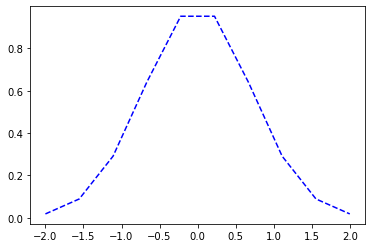

In [5]:
#regra do Trapézio repetida para m = 9
var('x')
f =str(e**(-x**2))
a = -2
b = 2
x=a
fa = eval(f)
x=b
fb = eval(f)
m = 9
h = (b-a)/m
print('h: ',h)
print('numero de passos: ',m)


Vx=[a]
Vy=[fa]
x=a+h

# Calculo da Integral para o intervalo com o passo h
integral = 0
while x <= b:
    y=eval(f)
    Vx.append(x)
    Vy.append(y)
    integral += 2*eval(f)
    x += h
print('vetor pontos de x')
print(Vx)
print('vetor pontos de y')
print(Vy)
print()
print('2*fx1+...+fn-1 = ', integral)
integral += fa
integral += fb
integral *= (h/2)
print()
print('valor da integral: ', integral)
plt.plot(Vx,Vy,'b--')

h:  0.23529411764705882
numero de passos:  17
vetor pontos de x
[-2, -1.7647058823529411, -1.5294117647058822, -1.2941176470588234, -1.0588235294117645, -0.8235294117647056, -0.5882352941176467, -0.3529411764705879, -0.1176470588235291, 0.11764705882352972, 0.35294117647058854, 0.5882352941176474, 0.8235294117647063, 1.0588235294117652, 1.294117647058824, 1.529411764705883, 1.7647058823529418, 2]
vetor pontos de y
[0.018315638888734054, 0.044414608152584904, 0.09641433876793135, 0.1873567951790878, 0.3259187158997793, 0.5075293729325068, 0.707497798418417, 0.8828786879572208, 0.9862545134574356, 0.9862545134574355, 0.8828786879572205, 0.7074977984184164, 0.5075293729325063, 0.3259187158997789, 0.18735679517908752, 0.09641433876793117, 0.04441460815258481, 0.018315638888734054]


valor da integral:  1.7634930118632137


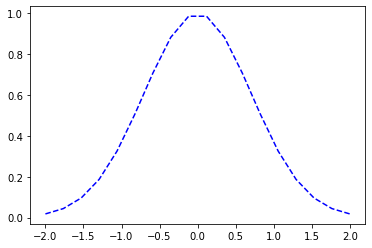

In [6]:
#regra do Trapézio repetida para m = 17
var('x')
f =str(e**(-x**2))
a = -2
b = 2
x=a
fa = eval(f)
x=b
fb = eval(f)
m = 17
h = (b-a)/m
print('h: ',h)
print('numero de passos: ',m)


Vx=[a]
Vy=[fa]
x=a+h

# Calculo da Integral para o intervalo com o passo h
integral = 0
while x < b:
    y=eval(f)
    Vx.append(x)
    Vy.append(y)
    integral += 2*eval(f)
    x += h
Vx.append(b)
Vy.append(fb)
print('vetor pontos de x')
print(Vx)
print('vetor pontos de y')
print(Vy)
print()
integral += fa
integral += fb
integral *= (h/2)
print()
print('valor da integral: ', integral)
plt.plot(Vx,Vy,'b--')

h:  0.0975609756097561
numero de passos:  41

valor da integral:  1.7640467453163697


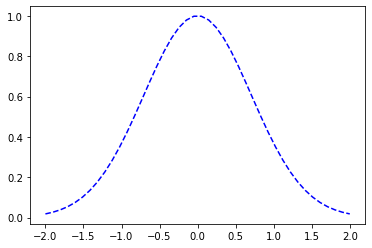

In [7]:
#regra do Trapézio repetida para m = 41
var('x')
f =str(e**(-x**2))
a = -2
b = 2
x=a
fa = eval(f)
x=b
fb = eval(f)
m = 41
h = (b-a)/m
print('h: ',h)
print('numero de passos: ',m)


Vx=[a]
Vy=[fa]
x=a+h

# Calculo da Integral para o intervalo com o passo h
integral = 0
while x < b:
    y=eval(f)
    Vx.append(x)
    Vy.append(y)
    integral += 2*eval(f)
    x += h
Vx.append(b)
Vy.append(fb)
integral += fa
integral += fb
integral *= (h/2)
print()
print('valor da integral: ', integral)
plt.plot(Vx,Vy,'b--')

h:  0.00997506234413965
numero de passos:  401

valor da integral:  1.7641615665847887


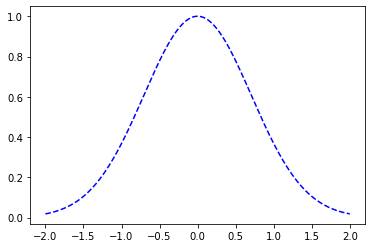

In [8]:
#regra do Trapézio repetida para m = 401
var('x')
f =str(e**(-x**2))
a = -2
b = 2
x=a
fa = eval(f)
x=b
fb = eval(f)
m = 401
h = (b-a)/m
print('h: ',h)
print('numero de passos: ',m)


Vx=[a]
Vy=[fa]
x=a+h

# Calculo da Integral para o intervalo com o passo h
integral = 0
while x < b:
    y=eval(f)
    Vx.append(x)
    Vy.append(y)
    integral += 2*eval(f)
    x += h
Vx.append(b)
Vy.append(fb)
integral += fa
integral += fb
integral *= (h/2)
print()
print('valor da integral: ', integral)
plt.plot(Vx,Vy,'b--')

Q4 - Uma das pragas que atacam a cana de acucar  ́e a broca (Diatraea sacharalis), esta vive dentro do colmo da cana, sendo difıcil a acao de agentes quımicos. Uma estrategia de combate eficaz  ́e a insercao de outros insetos predadores da broca no canavial. No Brasil, uma das especies utilizadas  ́e a vespa indiana (Apanteles flavipes).
A broca deposita seus ovos na cana, que eclodem em larvas apos 4 a 9 dias. As larvas ficam na fase de crisalida por mais 9 a 14 dias. Metaforsiando-se em mariposas completando seu ciclo de vida com duracao de 53 a 63 dias. A vespa interrompe este ciclo quando pica a lagarta da broca depositando seus ovos. Destes eclodem larvas da vespa terminando o ciclo da broca, caracterizando a competicao.
O modelo de Lotka-Volterra para a dinamica de populacoes do tipo presa-predador

A - Implemente e apresente algoritmos descritivos (desde a definicao das condicoes iniciais ate a solucao do sistema de equacoes, quando necessario) dos passos para a implementacao de cada um dos seguintes metodos, para a resolucao do sistema de
EDOs do modelo acima:
– Euler Implıcito;
– Runge-Kutta de quarta ordem.

B - Defina condicoes iniciais e valores para os coeficientes do modelo e apresente simulacoes obtidas com os metodos do item 2, apresentando a variacao das populacoes com o tempo e o espaco de fase u1 × u2, para diferentes nıveis de refinamento.

C - Compare e faca uma analise dos resultados obtidos.

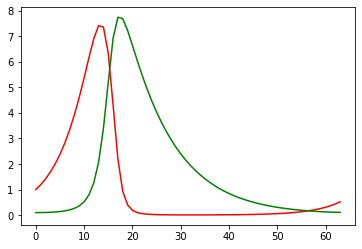

In [9]:
# Modelo com Euler Implicito
# Parametros dos modelo

a = 0.2 #c1 tx  de crescimento da presa 63/365
b = 0.1 #d1 tx de Predação (uma vespa para cada larva)
c = 0.1 #d2 tx de Decaimento (a vespa não apresenta predadoresporem não se reproduz sem a larva)
e = 0.1 #c2 tx conversão presa em predador( a presa volta a se reposduzir logo ao fim do ciclo de vida da vespa)
dt = 1 #(variação diaria)
max_time = 63 #(ciclo de vida da vespa)
def f(x,y):
    return a*x - b*x*y
def g(x,y):
    return -c*y + e*x*y
# tempo inicial e população
t = 0 
x = 1.0 # u1 População x1000
y = 0.1 # u2 População x1000

# lista para armazenamento das taxas de crescimento em função do tempo
t_list = []; x_list = []; y_list = []
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # Calculode valores para x , y e t
    t = t + dt
    x = x + f(x,y)*dt
    y = y + g(x,y)*dt

    
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
plt.plot(t_list, x_list, 'r')
plt.plot(t_list, y_list, 'g')

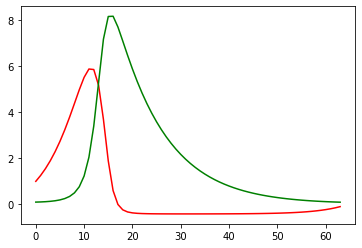

In [10]:
# Modelo com Runge-kutta
# Parametros dos modelo

a = 0.2 #c1 tx  de crescimento da presa 63/365
b = 0.1 #d1 tx de Predação (uma vespa para cada larva)
c = 0.1 #d2 tx de Decaimento (a vespa não apresenta predadoresporem não se reproduz sem a larva)
e = 0.1 #c2 tx conversão presa em predador( a presa volta a se reposduzir logo ao fim do ciclo de vida da vespa)
dt = 1 #(variação diaria)
max_time = 63 #(ciclo de vida da vespa)
def f(x,y):
    return a*x - b*x*y
def g(x,y):
    return -c*y + e*x*y
# tempo inicial e população
t = 0 
x = 1.0 # u1 População x1000
y = 0.1 # u2 População x1000

# lista para armazenamento das taxas de crescimento em função do tempo
t_list = []; x_list = []; y_list = []
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # Calculode valores para x , y e t
    t = t + dt
    k1 = f(x,y)
    k2 = f(x+dt/2, y + 0.5*dt*k1)
    k3 = f(x+dt/2, y + 0.5*dt*k2)
    k4 = f(x+dt/2, y + 0.5*dt*k3)
    x = x + (dt/6)*(k1 + 2*k2 +2*k3 +k4)
    l1 = g(x,y)
    l2 = g(x+dt/2, y + 0.5*dt*l1)
    l3 = g(x+dt/2, y + 0.5*dt*l2)
    l4 = g(x+dt/2, y + 0.5*dt*l3)
    y = y + (dt/6)*(l1 + 2*l2 +2*l3 +l4)

    
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
plt.plot(t_list, x_list, 'r')
plt.plot(t_list, y_list, 'g')

Análisando os métodos observa-se uma aproximação grande das duas aplicações. Com uma diferença no aumento populacional do predador no método de runge-kutta que é mais correto já que está ainda terra um crescimento mesmo após a diminuição da população da broca, devido a taxa de predação. 